In [6]:
#Import modules

%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib as plt

In [7]:
#import cvs fil som er hentet fra OsloMet Canvas siden
df = pd.read_csv('https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/Lab1/stud.csv')
df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   50 non-null     int64  
 1   Age         50 non-null     object 
 2   email       50 non-null     object 
 3   hrsStudy    50 non-null     object 
 4   FinalGrade  49 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB
    StudentID  Age              email hrsStudy  FinalGrade
0       47412   20  s47412@oslomet.no        5        46.0
1       15077   22  s15077@oslomet.no        0        65.0
2       15467   27  s15467@oslomet.no        1        26.0
3       17907   21  s17907@oslomet.no        6        68.0
4       13352  333  s13352@oslomet.no        4        34.0
5       88403   29  s88403@oslomet.no       11        62.0
6       56387   32  s56387@oslomet.no        9        29.0
7       95648   23  s95648@oslomet.no        3        38.0
8       63176   20

In [8]:
#omgjøring av datatyper
df['Age'] = pd.to_numeric(df['Age'], errors='coerce', downcast='integer')
df['hrsStudy'] = pd.to_numeric(df['hrsStudy'], errors='coerce', downcast='integer')
df['Age'] = df['Age'].astype('Int32')
df['hrsStudy'] = df['hrsStudy'].astype('Int32')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   50 non-null     int64  
 1   Age         49 non-null     Int32  
 2   email       50 non-null     object 
 3   hrsStudy    49 non-null     Int32  
 4   FinalGrade  49 non-null     float64
dtypes: Int32(2), float64(1), int64(1), object(1)
memory usage: 1.8+ KB


In [9]:
df=df.replace(r'^\s*$', np.nan, regex=True) #Replace blank values with np.nan values

In [10]:
missing_values = df.isna().sum()
print("missing_values")
print(missing_values)

missing_values
StudentID     0
Age           1
email         0
hrsStudy      1
FinalGrade    1
dtype: int64


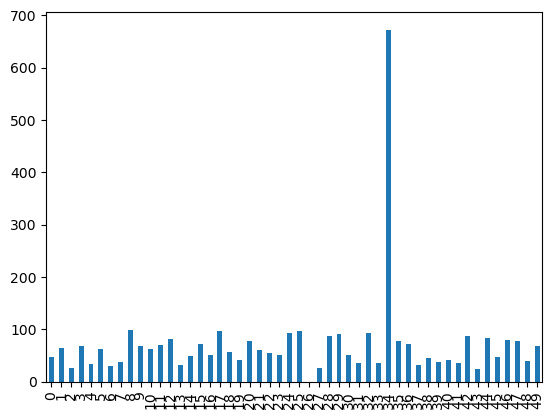

In [11]:
df["FinalGrade"].plot.bar()

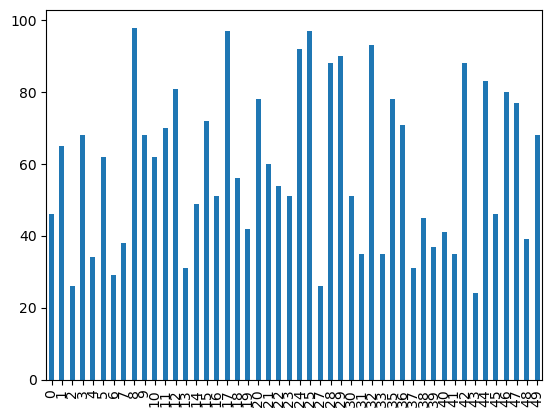

In [12]:
#tar bort outliner
z_scores = (df['FinalGrade'] - df['FinalGrade'].mean()) / df['FinalGrade'].std()
abs_z_scores = np.abs(z_scores)
threshold = 3
filtered_entries = (abs_z_scores < threshold)
df_clean = df[filtered_entries]

df_clean.to_csv('cleaned_data.csv', index=False)
df_clean["FinalGrade"].plot.bar()



/var/folders/gg/17hyhnzx2sxdx8vtxpzt98sw0000gn/T/ipykernel_10667/560869487.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Grade'] = df_clean['FinalGrade'].apply(get_grade)


    FinalGrade Grade
0         46.0     F
1         65.0     D
2         26.0     F
3         68.0     D
4         34.0     F
5         62.0     D
6         29.0     F
7         38.0     F
8         98.0     A
9         68.0     D
10        62.0     D
11        70.0     D
12        81.0     B
13        31.0     F
14        49.0     F
15        72.0     C
16        51.0     E
17        97.0     A
18        56.0     E
19        42.0     F
20        78.0     C
21        60.0     E
22        54.0     E
23        51.0     E
24        92.0     A
25        97.0     A
27        26.0     F
28        88.0     B
29        90.0     B
30        51.0     E
31        35.0     F
32        93.0     A
33        35.0     F
35        78.0     C
36        71.0     C
37        31.0     F
38        45.0     F
39        37.0     F
40        41.0     F
41        35.0     F
42        88.0     B
43        24.0     F
44        83.0     B
45        46.0     F
46        80.0     C
47        77.0     C
48        39.

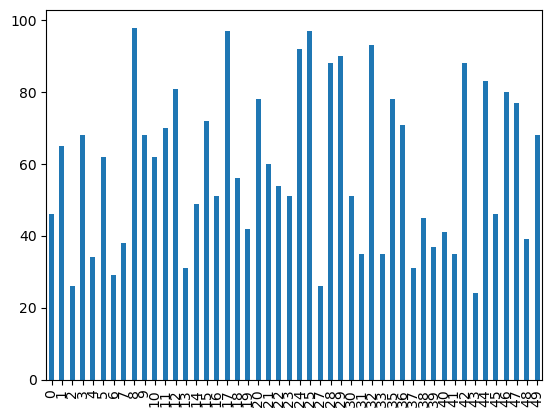

In [13]:
# Adding the grade column based on your provided code
def get_grade(score):
    if 91 <= score <= 100:
        return 'A'
    elif 81 <= score <= 90:
        return 'B'
    elif 71 <= score <= 80:
        return 'C'
    elif 61 <= score <= 70:
        return 'D'
    elif 51 <= score <= 60:
        return 'E'
    else:
        return 'F'

df_clean['Grade'] = df_clean['FinalGrade'].apply(get_grade)

df_clean["FinalGrade"].plot.bar()
print(df_clean[['FinalGrade' , 'Grade']])